In [9]:
import pymc as pm
import pytensor.tensor as pt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

# Seperate models

In [4]:
def simulate_experiment(rate=0.60,independents_p=0.05,conformist_p=0.5,n=12,precision=100):
    '''
    rate_of_independents - what proportion of the subjects should be 
    independents, the rest are conformists.
    independents_p - the probability of a mistake from an independent
    conformist_p - the probability of a mistake from a conformist
    n - the number of critical trials in the experiment
    precision - the number of simulated people 
    '''

    data = []

    for i in range(precision):
        
        # decide whether they are independent or conformist
        
        if np.random.choice([1,0],p=[rate, 1-rate]) == 1:
            
            # they are an independent
            # then their errors come from a binomial
            # with a very low error rate
            
            errors = stats.binom(p=independents_p,n=n).rvs()
            
        else:
            
            # they are a conformist
            # then their errors come from a binomial
            # with a high error rate

            errors = stats.binom(p=conformist_p,n=n).rvs()
            
        data.append(errors)

    return np.array(data)

data = simulate_experiment(rate=0.60,independents_p=0.05,conformist_p=0.5,n=12,precision=60)
data

array([ 1,  5,  3,  2,  5,  4,  5,  0,  0,  5,  0,  1,  5,  0,  6,  6,  1,
        0,  0,  8,  1,  0,  7,  7,  1,  7,  2,  0,  2,  0,  6,  9,  7,  1,
        0,  1,  1,  6,  6,  4,  2,  0,  1,  0,  0,  0,  1,  6,  6,  1,  1,
        0,  0,  0,  6,  3,  0,  5, 10,  1])

In [5]:
us_data = simulate_experiment(rate=0.60,independents_p=0.05,conformist_p=0.5,n=12,precision=60)
fiji_data = simulate_experiment(rate=0.4,independents_p=0.05,conformist_p=0.5,n=12,precision=60)
fiji_data

array([ 4,  1,  9,  2,  0,  7,  3,  1,  7,  6,  6,  0,  6,  6, 10,  3,  0,
        7,  5,  5,  7,  4,  1,  5,  2,  6,  7,  0, 10,  0,  3,  6,  9,  7,
        6,  7,  2,  7,  8,  0,  8,  9, 12,  0,  1,  8,  1,  6,  6,  8,  0,
        5,  1,  2,  0,  0,  2,  6,  0,  4])

In [9]:
# single country estimation

with pm.Model() as m0:
    w1 = pm.Beta('w1',1,1)
    w = [w1,1-w1]
    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]
    y = pm.Mixture('error',w=w,comp_dists=components,observed=fiji_data)

    trace_fiji = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w1, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


In [10]:
az.summary(trace_fiji)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w1,0.397,0.067,0.267,0.518,0.001,0.001,4235.0,3055.0,1.0
p0,0.077,0.020,0.041,0.116,0.000,0.000,4411.0,2986.0,1.0
p1,0.558,0.027,0.507,0.609,0.000,0.000,4737.0,3246.0,1.0


In [13]:
# single country estimation

with pm.Model() as m1:
    w1 = pm.Beta('w1',1,1)
    w = [w1,1-w1]
    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]
    y = pm.Mixture('error',w=w,comp_dists=components,observed=us_data)

    trace_us = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w1, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


In [15]:
az.summary(trace_us)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w1,0.609,0.066,0.487,0.738,0.001,0.001,4392.0,3272.0,1.0
p0,0.064,0.014,0.040,0.091,0.000,0.000,4356.0,2983.0,1.0
p1,0.492,0.034,0.426,0.553,0.000,0.000,4937.0,2645.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

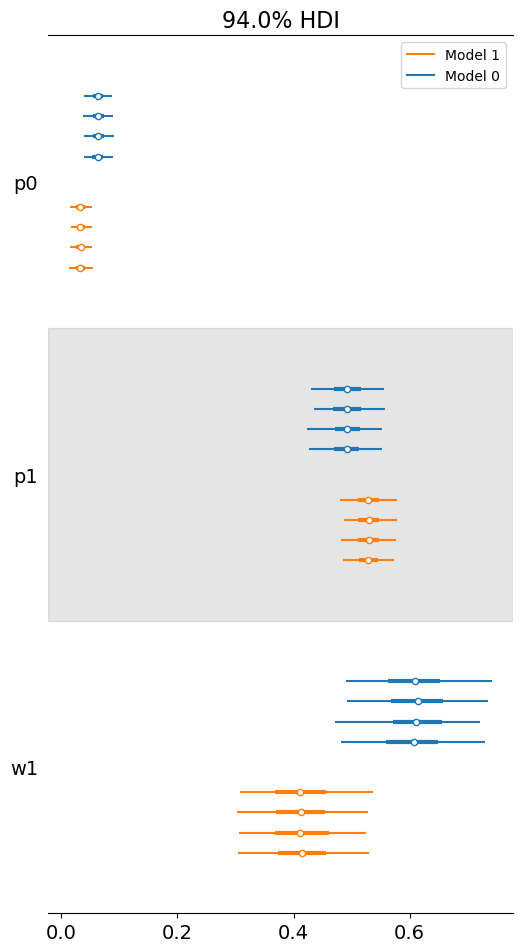

In [17]:
az.plot_forest([trace_us,trace_fiji])

# Multi-level model

(array([ 33., 106., 188., 249., 199., 120.,  75.,  18.,   8.,   4.]),
 array([0.13743519, 0.18853267, 0.23963014, 0.29072761, 0.34182509,
        0.39292256, 0.44402003, 0.49511751, 0.54621498, 0.59731245,
        0.64840993]),
 <BarContainer object of 10 artists>)

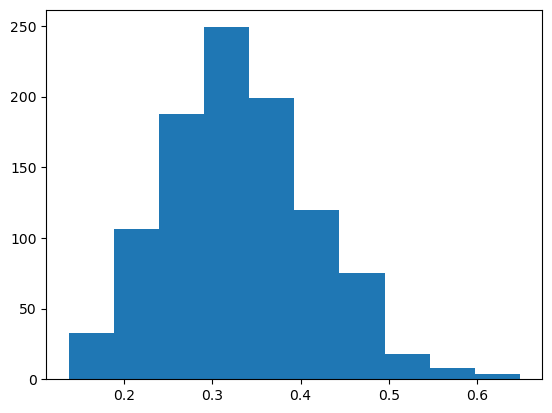

In [2]:
rate = stats.beta(10,20).rvs(1000)

plt.hist(rate)

In [5]:
rate = stats.beta(5,10).rvs(2)
print(rate)
group_0_data = simulate_experiment(rate=rate[0],independents_p=0.05,conformist_p=0.5,n=12,precision=50)
group_1_data = simulate_experiment(rate=rate[1],independents_p=0.05,conformist_p=0.5,n=12,precision=50)

[0.24324236 0.38411648]


In [6]:
with pm.Model() as m3:

    # cluster components

    independents_0 = pm.Beta('w_0',1,1)
    w_0 = [independents_0,1-independents_0]
    independents_1 = pm.Beta('w_1',1,1)
    w_1 = [independents_1,1-independents_1]

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y0 = pm.Mixture('error_0',w=w_0,comp_dists=components,observed=group_0_data)
    y1 = pm.Mixture('error_1',w=w_1,comp_dists=components,observed=group_1_data)

    trace3 = pm.sample()

KeyboardInterrupt: 

In [17]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w_0,0.403,0.069,0.270,0.527,0.001,0.001,5568.0,3359.0,1.0
w_1,0.343,0.068,0.222,0.472,0.001,0.001,6309.0,3319.0,1.0
p0,0.052,0.012,0.030,0.074,0.000,0.000,4443.0,2974.0,1.0
p1,0.506,0.020,0.469,0.542,0.000,0.000,5320.0,3263.0,1.0


## two clusters

In [7]:
with pm.Model() as m4:

    # global parameters

    a = pm.Exponential('a',1)
    b = pm.Exponential('b',1)

    # cluster components

    independents_0 = pm.Beta('w_0',a,b)
    w_0 = [independents_0,1-independents_0]
    independents_1 = pm.Beta('w_1',a,b)
    w_1 = [independents_1,1-independents_1]

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y0 = pm.Mixture('error_0',w=w_0,comp_dists=components,observed=group_0_data)
    y1 = pm.Mixture('error_1',w=w_1,comp_dists=components,observed=group_1_data)

    trace4 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, w_0, w_1, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


In [10]:
az.summary(trace4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.179,0.751,0.106,2.565,0.013,0.010,3223.0,2777.0,1.0
b,1.659,1.062,0.069,3.544,0.017,0.013,3783.0,2755.0,1.0
w_0,0.300,0.065,0.174,0.416,0.001,0.001,4565.0,2858.0,1.0
w_1,0.418,0.068,0.291,0.546,0.001,0.001,4182.0,3016.0,1.0
p0,0.064,0.013,0.041,0.089,0.000,0.000,4204.0,2572.0,1.0
p1,0.517,0.019,0.480,0.552,0.000,0.000,4235.0,2699.0,1.0


c:\Users\dsaun\Anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\pairplot.py:232: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  gridsize = int(dataset.dims["draw"] ** 0.35)


array([[<Axes: ylabel='b'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='w_0'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='w_1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='p0'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='a', ylabel='p1'>, <Axes: xlabel='b'>,
        <Axes: xlabel='w_0'>, <Axes: xlabel='w_1'>, <Axes: xlabel='p0'>]],
      dtype=object)

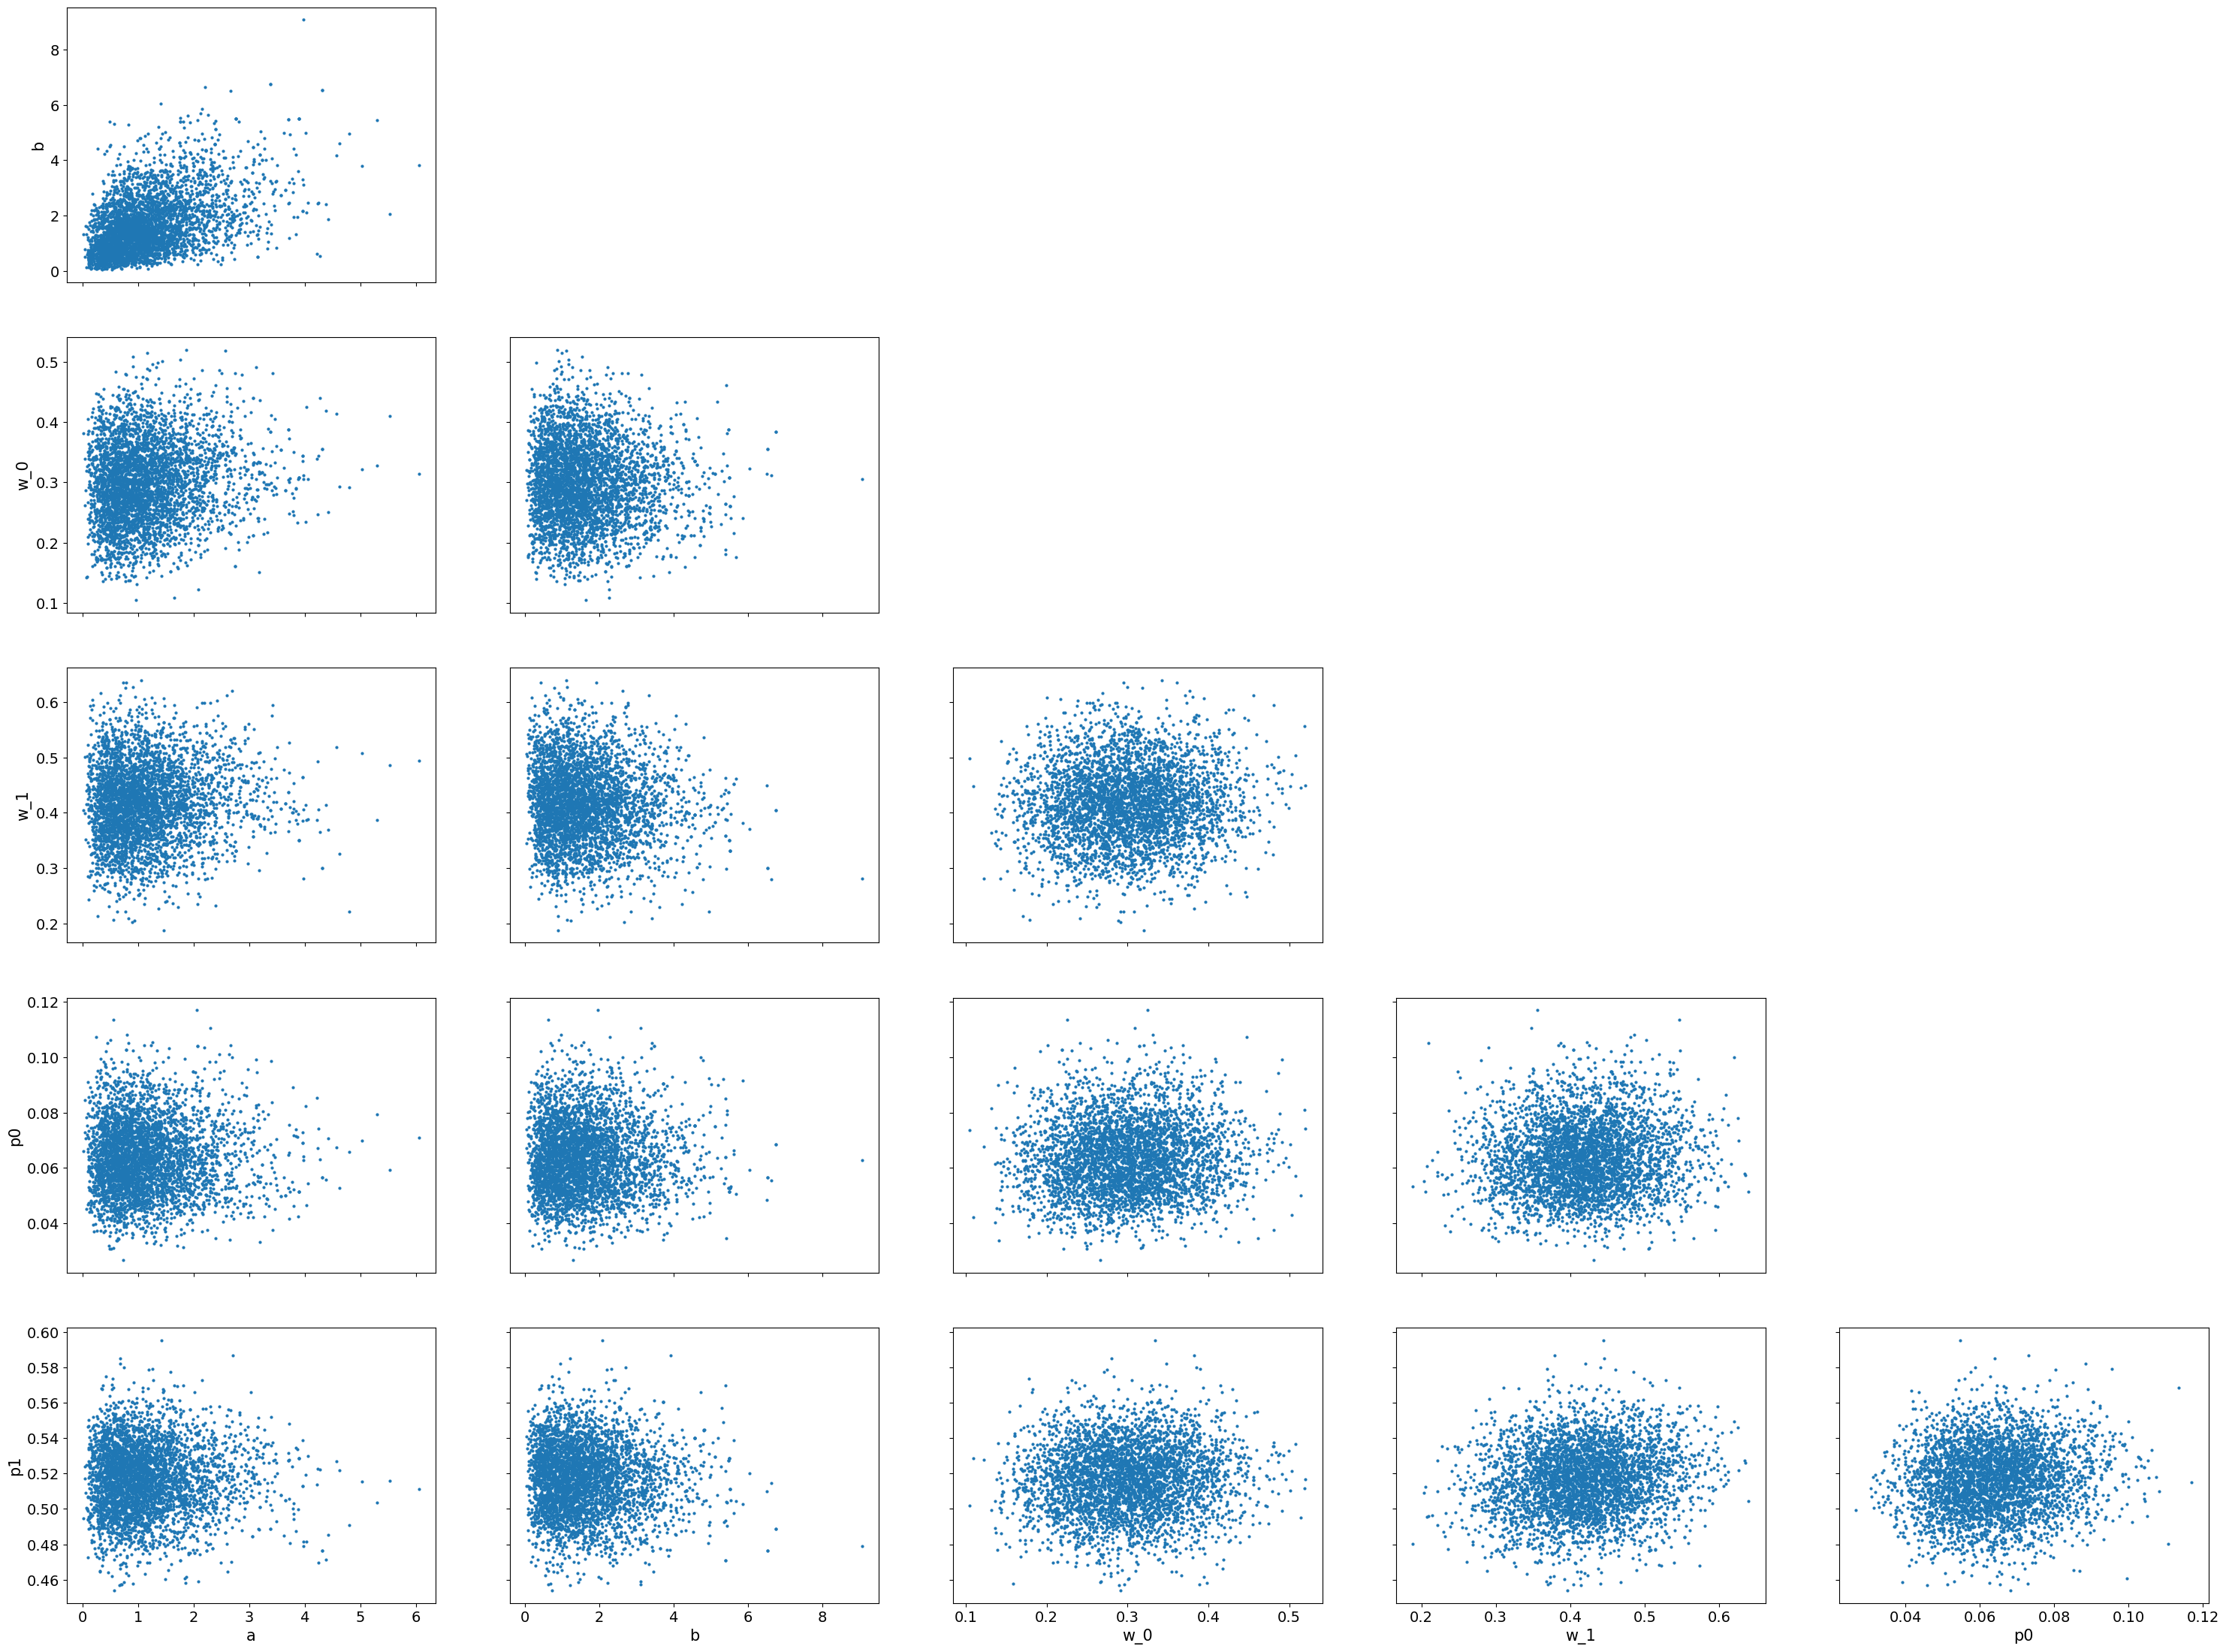

In [11]:
az.plot_pair(trace4)

## three clusters

In [33]:
rate = stats.beta(5,10).rvs(3)
print(rate)
group_0_data = simulate_experiment(rate=rate[0],independents_p=0.05,conformist_p=0.5,n=12,precision=50)
group_1_data = simulate_experiment(rate=rate[1],independents_p=0.05,conformist_p=0.5,n=12,precision=50)
group_2_data = simulate_experiment(rate=rate[2],independents_p=0.05,conformist_p=0.5,n=12,precision=50)

[0.25179114 0.32895037 0.44669893]


In [79]:
group_2_data

array([6, 6, 0, 1, 8, 0, 0, 0, 2, 3, 5, 0, 7, 2, 6, 0, 1, 0, 6, 6, 5, 2,
       5, 6, 1, 3, 1, 2, 4, 8, 1, 7, 1, 4, 2, 4, 1, 6, 0, 5, 7, 9, 1, 0,
       8, 9, 1, 5, 7, 6])

In [34]:
with pm.Model() as m4a:

    # global parameters

    a = pm.Exponential('a',1)
    b = pm.Exponential('b',1)

    # cluster components

    independents_0 = pm.Beta('w_0',a,b)
    w_0 = [independents_0,1-independents_0]
    independents_1 = pm.Beta('w_1',a,b)
    w_1 = [independents_1,1-independents_1]
    independents_2 = pm.Beta('w_2',a,b)
    w_2 = [independents_1,1-independents_1]

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y0 = pm.Mixture('error_0',w=w_0,comp_dists=components,observed=group_0_data)
    y1 = pm.Mixture('error_1',w=w_1,comp_dists=components,observed=group_1_data)
    y2 = pm.Mixture('error_2',w=w_2,comp_dists=components,observed=group_2_data)

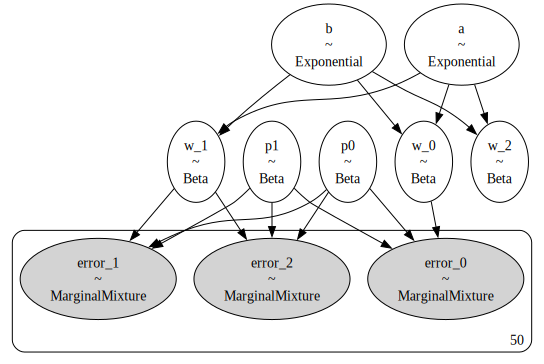

In [35]:
m4a.to_graphviz()

In [42]:
pm.draw([y0,y1,y2])

[array([2, 3, 5, 1, 2, 2, 1, 0, 2, 5, 2, 2, 0, 7, 2, 1, 0, 0, 1, 2, 1, 2,
        2, 2, 4, 1, 0, 5, 2, 2, 2, 3, 7, 4, 0, 2, 3, 4, 0, 3, 4, 1, 3, 4,
        3, 2, 5, 2, 0, 5], dtype=int64),
 array([1, 1, 5, 0, 2, 3, 6, 2, 2, 1, 3, 0, 2, 4, 4, 3, 4, 2, 2, 4, 4, 3,
        1, 2, 4, 5, 2, 3, 2, 1, 2, 2, 4, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 2,
        3, 2, 2, 0, 0, 0], dtype=int64),
 array([4, 2, 0, 1, 2, 5, 3, 2, 2, 2, 1, 2, 3, 4, 3, 0, 2, 5, 1, 2, 3, 4,
        5, 0, 2, 0, 0, 1, 1, 2, 3, 2, 0, 5, 6, 4, 1, 1, 4, 1, 2, 2, 1, 1,
        2, 0, 1, 4, 1, 3], dtype=int64)]

In [43]:
with m4a:
    trace4a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, w_0, w_1, w_2, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


In [44]:
az.summary(trace4a)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.955,0.608,0.050,2.068,0.014,0.010,1542.0,1061.0,1.0
b,1.798,1.171,0.138,3.904,0.024,0.018,2160.0,1980.0,1.0
w_0,0.190,0.055,0.092,0.296,0.001,0.001,4084.0,2811.0,1.0
w_1,0.324,0.050,0.231,0.418,0.001,0.001,4442.0,2485.0,1.0
w_2,0.367,0.297,0.000,0.919,0.006,0.004,1632.0,821.0,1.0
p0,0.050,0.012,0.028,0.073,0.000,0.000,4237.0,2546.0,1.0
p1,0.486,0.015,0.460,0.515,0.000,0.000,3305.0,2844.0,1.0


### 4b - manual shapes, dirichlet distributions

In [184]:
with pm.Model() as m4b:

    # global parameters

    mean = pm.Dirichlet('mu',[10,10])
    sigma = pm.Gamma('sigma',3,1)

    hyper_prior = weights * scale

    # cluster components

    w_0 = pm.Dirichlet('w_0',hyper_prior)
    w_1 = pm.Dirichlet('w_1',hyper_prior)
    w_2 = pm.Dirichlet('w_2',hyper_prior)

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y0 = pm.Mixture('error_0',w=w_0,comp_dists=components,observed=group_0_data)
    y1 = pm.Mixture('error_1',w=w_1,comp_dists=components,observed=group_1_data)
    y2 = pm.Mixture('error_2',w=w_2,comp_dists=components,observed=group_2_data)

(array([115.,  99.,  91., 104.,  97., 102.,  98.,  97.,  90., 107.]),
 array([2.75123085e-12, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

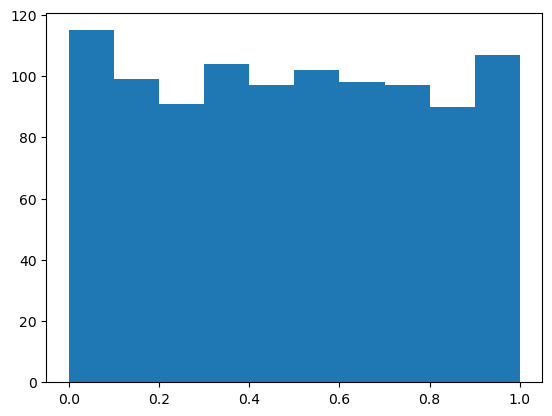

In [185]:
weight_samples = pm.draw(w_0,draws=1000)
weight_samples = weight_samples[:,0]
plt.hist(weight_samples)

In [213]:
with m4b:
    trace4b = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, scale, w_0, w_1, w_2, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


In [214]:
# 0.25179114 0.32895037 0.44669893

az.summary(trace4b)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.428,0.087,0.265,0.587,0.001,0.001,4328.0,3249.0,1.0
w[1],0.572,0.087,0.413,0.735,0.001,0.001,4328.0,3249.0,1.0
scale,3.678,1.793,0.860,6.945,0.027,0.020,4456.0,3033.0,1.0
w_0[0],0.198,0.056,0.097,0.302,0.001,0.001,4892.0,2970.0,1.0
w_0[1],0.802,0.056,0.698,0.903,0.001,0.001,4892.0,2970.0,1.0
w_1[0],0.227,0.061,0.115,0.339,0.001,0.001,3957.0,2740.0,1.0
w_1[1],0.773,0.061,0.661,0.885,0.001,0.001,3957.0,2950.0,1.0
w_2[0],0.444,0.072,0.317,0.586,0.001,0.001,3683.0,3150.0,1.0
w_2[1],0.556,0.072,0.414,0.683,0.001,0.001,3683.0,3150.0,1.0
p0,0.051,0.012,0.029,0.075,0.000,0.000,4236.0,2768.0,1.0


In [216]:
0.428 * 3.678, 0.572 * 3.678

(1.574184, 2.1038159999999997)

## generalizing to many clusters

In [81]:
def mixture_likelihood(data,rate,independents_p,conformist_p,n):
    '''
    Calculates the likelihood the data, assuming a mixture of two binomial distributions.

    data - an array or list with integer entries.
    rate - what proportion of the subjects should be 
    independents, the rest are conformists.
    independents_p - the probability of a mistake from an independent.
    conformist_p - the probability of a mistake from a conformist.
    n - the number of critical trials in the experiment.
    '''

    ll1 = rate*stats.binom(n=n,p=independents_p).pmf(data)
    ll2 = (1-rate)*stats.binom(n=n,p=conformist_p).pmf(data)

    return np.prod(ll1 + ll2)

0.4225926102140555
0.37524340688225394
0.35105117753365916


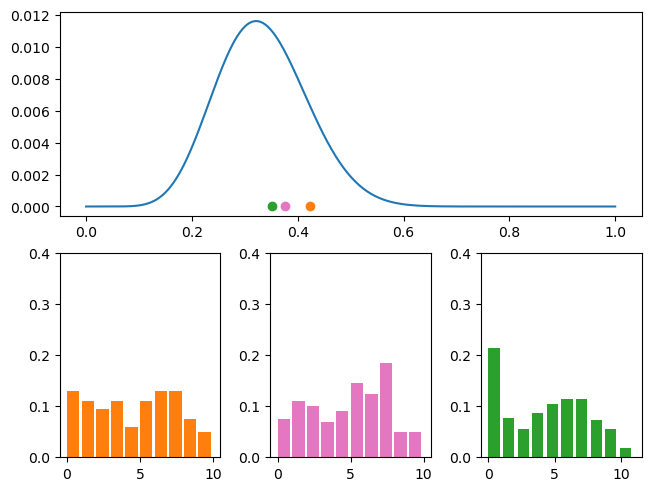

In [27]:
fig = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AAA
    BCD
    """)

global_dist = stats.beta(10,20)

x = np.linspace(0,1,400)
y = global_dist.pdf(x)
y = y / sum(y)

fig['A'].plot(x,y)
global_data = np.array([])

ids = np.array([0,1,2])
country_id = np.repeat(ids,200)

plot_id = ['B','C','D']
plot_colors = ['tab:orange','tab:pink','tab:green']

for i in range(3):
    rate = global_dist.rvs()
    print(rate)
    subgroup_data = simulate_experiment(rate=rate,independents_p=0.1,conformist_p=0.5,n=12,precision=200)
    
    fig['A'].plot(rate,[0],'o',color=plot_colors[i])
    fig[plot_id[i]].hist(subgroup_data,width=0.85,bins=10,color=plot_colors[i],density=True)
    fig[plot_id[i]].set_ylim([0,0.4])
    global_data = np.concatenate([global_data,subgroup_data])

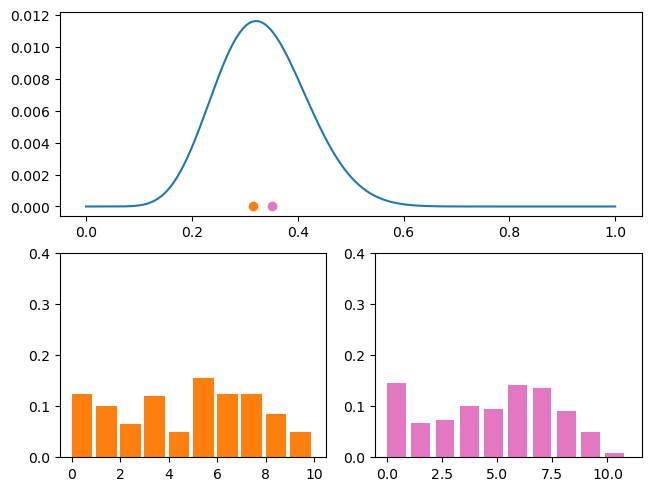

In [76]:
fig = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AAAA
    BBCC
    """)

global_dist = stats.beta(10,20)

x = np.linspace(0,1,400)
y = global_dist.pdf(x)
y = y / sum(y)

fig['A'].plot(x,y)
global_data = np.array([])

ids = np.array([0,1])
country_id = np.repeat(ids,200)

plot_id = ['B','C']
plot_colors = ['tab:orange','tab:pink']

for i in range(2):
    rate = global_dist.rvs()
    subgroup_data = simulate_experiment(rate=rate,independents_p=0.1,conformist_p=0.5,n=12,precision=200)
    
    fig['A'].plot(rate,[0],'o',color=plot_colors[i])
    fig[plot_id[i]].hist(subgroup_data,width=0.85,bins=10,color=plot_colors[i],density=True)
    fig[plot_id[i]].set_ylim([0,0.4])
    global_data = np.concatenate([global_data,subgroup_data])

In [90]:
import ipywidgets as widgets

def draw_multi_level_mixture(ids,
                             counts,
                             global_A,global_B,
                             cluster_1_rate,
                             cluster_2_rate,
                             independents_p,
                             conformist_p):

    # set up plotting structure

    fig = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AAAA
    BBCC
    """)
    plot_id = ['B','C']
    plot_colors = ['tab:orange','tab:pink']
    rates = [cluster_1_rate,cluster_2_rate]

    global_dist = stats.beta(global_A,global_B)

    # generate global plot

    x = np.linspace(0,1,400)
    y = global_dist.pdf(x)
    y = y / sum(y)

    fig['A'].plot(x,y)

    # generate subplots

    outcomes = range(13)

    sub_group_likelihoods = []

    for i in range(2):

        # plot data

        group_counts = global_data[country_id==i]

        counts = []
    
        for j in outcomes:

            matches = np.sum(np.where(group_counts == j))
            counts.append(matches)

        data_dist = np.array(counts) / sum(counts)
        fig[plot_id[i]].bar(outcomes,data_dist,alpha=0.5,color="grey")

        # calculate likelihood

        likelihood = mixture_likelihood(group_counts,rates[i],independents_p,conformist_p,12)
        sub_group_likelihoods.append(likelihood)

        # plot distribution

        distribution = []

        for j in outcomes:
            ll = mixture_likelihood(j,rates[i],independents_p,conformist_p,12)
            distribution.append(ll)
        
        fig['A'].plot(rates[i],[0],'o',color=plot_colors[i])
        # fig[plot_id[i]].bar()
        fig[plot_id[i]].bar(outcomes,distribution,color=plot_colors[i],alpha=0.5)

    print(np.sum(np.log(sub_group_likelihoods)))


widgets.interact_manual(draw_multi_level_mixture,
                ids=widgets.fixed(country_id),
                counts=widgets.fixed(global_data),
                global_A=widgets.FloatSlider(min=0,max=50,step=0.1,value=2),
                global_B=widgets.FloatSlider(min=0,max=50,step=0.1,value=2),
                cluster_1_rate=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
                cluster_2_rate=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
                independents_p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
                conformist_p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5));

interactive(children=(FloatSlider(value=2.0, description='global_A', max=50.0), FloatSlider(value=2.0, descrip…

In [99]:
ids = np.array([0,1,2])
country_id = np.repeat(ids,5)

w1 = 0.2
w2 = 0.3
w3 = 0.4

w = np.array([[w1,1-w1],
             [w2,1-w2],
             [w3,1-w3]])

components = [pm.Binomial.dist(n=12,p=0.1),pm.Binomial.dist(n=12,p=0.5)]

y = pm.Mixture.dist(w=w[country_id],comp_dists=components)

data = pm.draw(y)
data,country_id

(array([5, 6, 3, 1, 1, 5, 4, 8, 2, 6, 5, 0, 9, 1, 7], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]))

### m5 - shapes

In [97]:
with pm.Model() as m5:

    # global parameters

    # a = pm.Exponential('a',1)
    # b = pm.Exponential('b',1)
    a = 2
    b = 2

    # cluster components

    independents_0 = pm.Beta('w',alpha=a,beta=b,shape=3)
    w = pt.stack([independents_0, 1-independents_0]).T

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y = pm.Mixture('error',w=w[country_id],comp_dists=components,observed=data[country_id])

In [91]:
a = pm.draw(independents_0)
a, 1-a
np.stack([a,1-a]).T

array([[0.27285054, 0.72714946],
       [0.51654294, 0.48345706],
       [0.21113419, 0.78886581]])

In [81]:
w.eval()

array([[0.72536683, 0.27463317],
       [0.59389099, 0.40610901],
       [0.87007614, 0.12992386]])

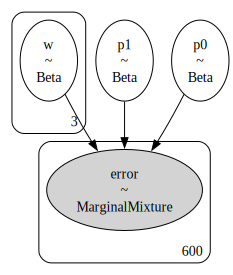

In [82]:
m5.to_graphviz()

In [98]:
with m5:
    trace5 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


In [101]:
az.summary(trace5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.519,0.234,0.114,0.921,0.005,0.004,1988.0,2876.0,1.00
w[1],0.530,0.234,0.102,0.910,0.004,0.003,2633.0,2516.0,1.00
w[2],0.474,0.242,0.075,0.904,0.005,0.004,2387.0,2362.0,1.00
p0,0.540,0.068,0.400,0.653,0.001,0.001,2454.0,2452.0,1.00
p1,0.579,0.085,0.428,0.715,0.005,0.004,806.0,321.0,1.01


### m5a - manual indexing

In [45]:
with pm.Model() as m5a:

    # global parameters

    a = pm.Exponential('a',1)
    b = pm.Exponential('b',1)

    # cluster components

    independents_0 = pm.Beta('w',alpha=a,beta=b,shape=3)
    w = pt.stack([independents_0, 1-independents_0]).T

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y = pm.Mixture('error_1',w=w[0],comp_dists=components,observed=group_0_data)
    y = pm.Mixture('error_2',w=w[1],comp_dists=components,observed=group_1_data)
    y = pm.Mixture('error_3',w=w[2],comp_dists=components,observed=group_2_data)

In [57]:
w.eval()

array([[0.01106346, 0.98893654],
       [0.45493492, 0.54506508],
       [0.08714507, 0.91285493]])

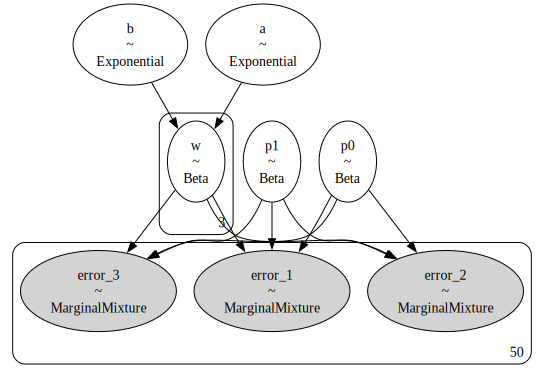

In [46]:
m5.to_graphviz()

In [47]:
with m5:
    trace5 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, w, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [48]:
az.summary(trace5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.066,0.598,0.176,2.134,0.009,0.007,4247.0,2929.0,1.0
b,2.015,1.211,0.294,4.236,0.019,0.014,4122.0,2688.0,1.0
w[0],0.192,0.055,0.097,0.299,0.001,0.001,5841.0,2640.0,1.0
w[1],0.220,0.060,0.118,0.339,0.001,0.001,5171.0,3013.0,1.0
w[2],0.438,0.074,0.297,0.569,0.001,0.001,4635.0,2515.0,1.0
p0,0.051,0.012,0.029,0.072,0.000,0.000,5513.0,3217.0,1.0
p1,0.487,0.015,0.461,0.517,0.000,0.000,4895.0,2796.0,1.0


### m5b - Dirichlet

In [126]:
coords = {"id":country_id}

with pm.Model(coords=coords) as m5b:

    # global parameters

    # a = pm.Exponential('a',1)
    # b = pm.Exponential('b',1)
    a = 2
    b = 2

    # cluster components

    w = pm.Dirichlet('w',[[a,b],
                          [a,b],
                          [a,b]])

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y = pm.Mixture('error',w=w[country_id],comp_dists=components,observed=data[country_id])

In [125]:
pm.draw(w)

array([[0.49169737, 0.50830263],
       [0.45593846, 0.54406154],
       [0.84569514, 0.15430486]])

In [127]:
with m5b:
    trace5 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, p0, p1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [128]:
az.summary(trace5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"w[0, 0]",0.475,0.231,0.081,0.892,0.005,0.004,1971.0,1131.0,1.0
"w[0, 1]",0.525,0.231,0.108,0.919,0.005,0.004,1971.0,1131.0,1.0
"w[1, 0]",0.445,0.240,0.062,0.876,0.005,0.004,2073.0,2408.0,1.0
"w[1, 1]",0.555,0.240,0.124,0.938,0.005,0.004,2073.0,2408.0,1.0
"w[2, 0]",0.562,0.244,0.133,0.958,0.006,0.004,1643.0,1882.0,1.0
"w[2, 1]",0.438,0.244,0.042,0.867,0.006,0.004,1643.0,1882.0,1.0
p0,0.360,0.082,0.213,0.519,0.002,0.001,1902.0,2807.0,1.0
p1,0.423,0.079,0.274,0.571,0.002,0.001,1444.0,1278.0,1.0


In [54]:
with pm.Model() as m5b:

    # global parameters

    # a = pm.Beta('a',mu=0.5,sigma=0.25)

    # cluster components

    w = pm.Dirichlet('w',[[1,1],
                          [1,1],
                          [1,1]])

    # accuracy components

    p0 = pm.Beta('p0',0.5,2) # independent component
    p1 = pm.Beta('p1',2,0.5) # conformist component
    
    components = [pm.Binomial.dist(n=12,p=p0),pm.Binomial.dist(n=12,p=p1)]

    # likelihood

    y = pm.Mixture('error',w=w[country_id],comp_dists=components,observed=global_data[country_id])

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'w\n0'}>,
        <Axes: title={'center': 'w\n1'}>],
       [<Axes: title={'center': 'w\n2'}>, <Axes: title={'center': 'p0'}>,
        <Axes: title={'center': 'p1'}>]], dtype=object)

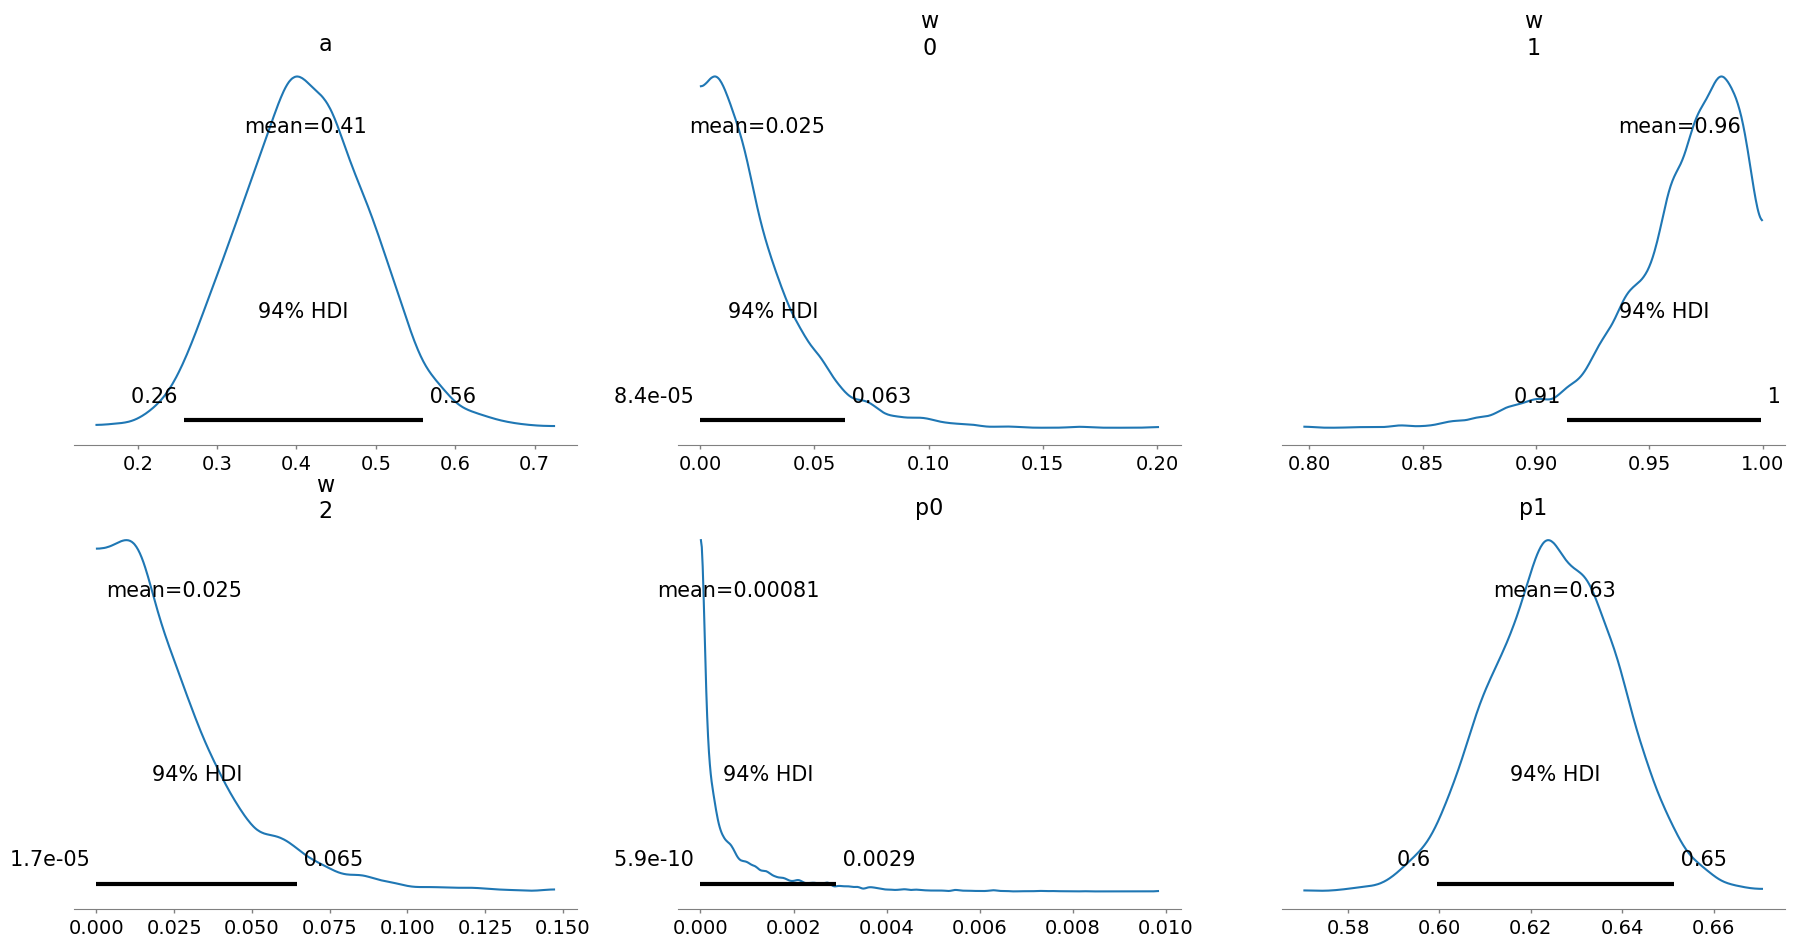

In [42]:
az.plot_posterior(trace5)

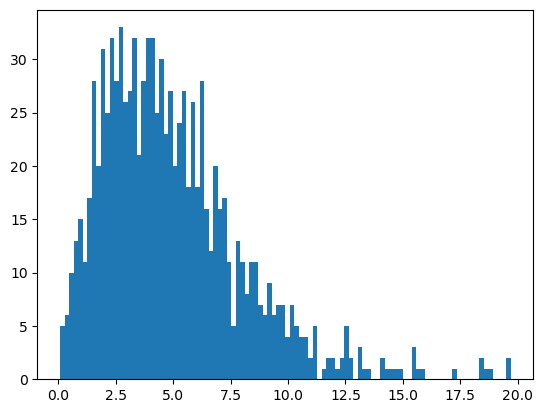

In [145]:
plt.hist(pm.draw(a,1000),bins=100);

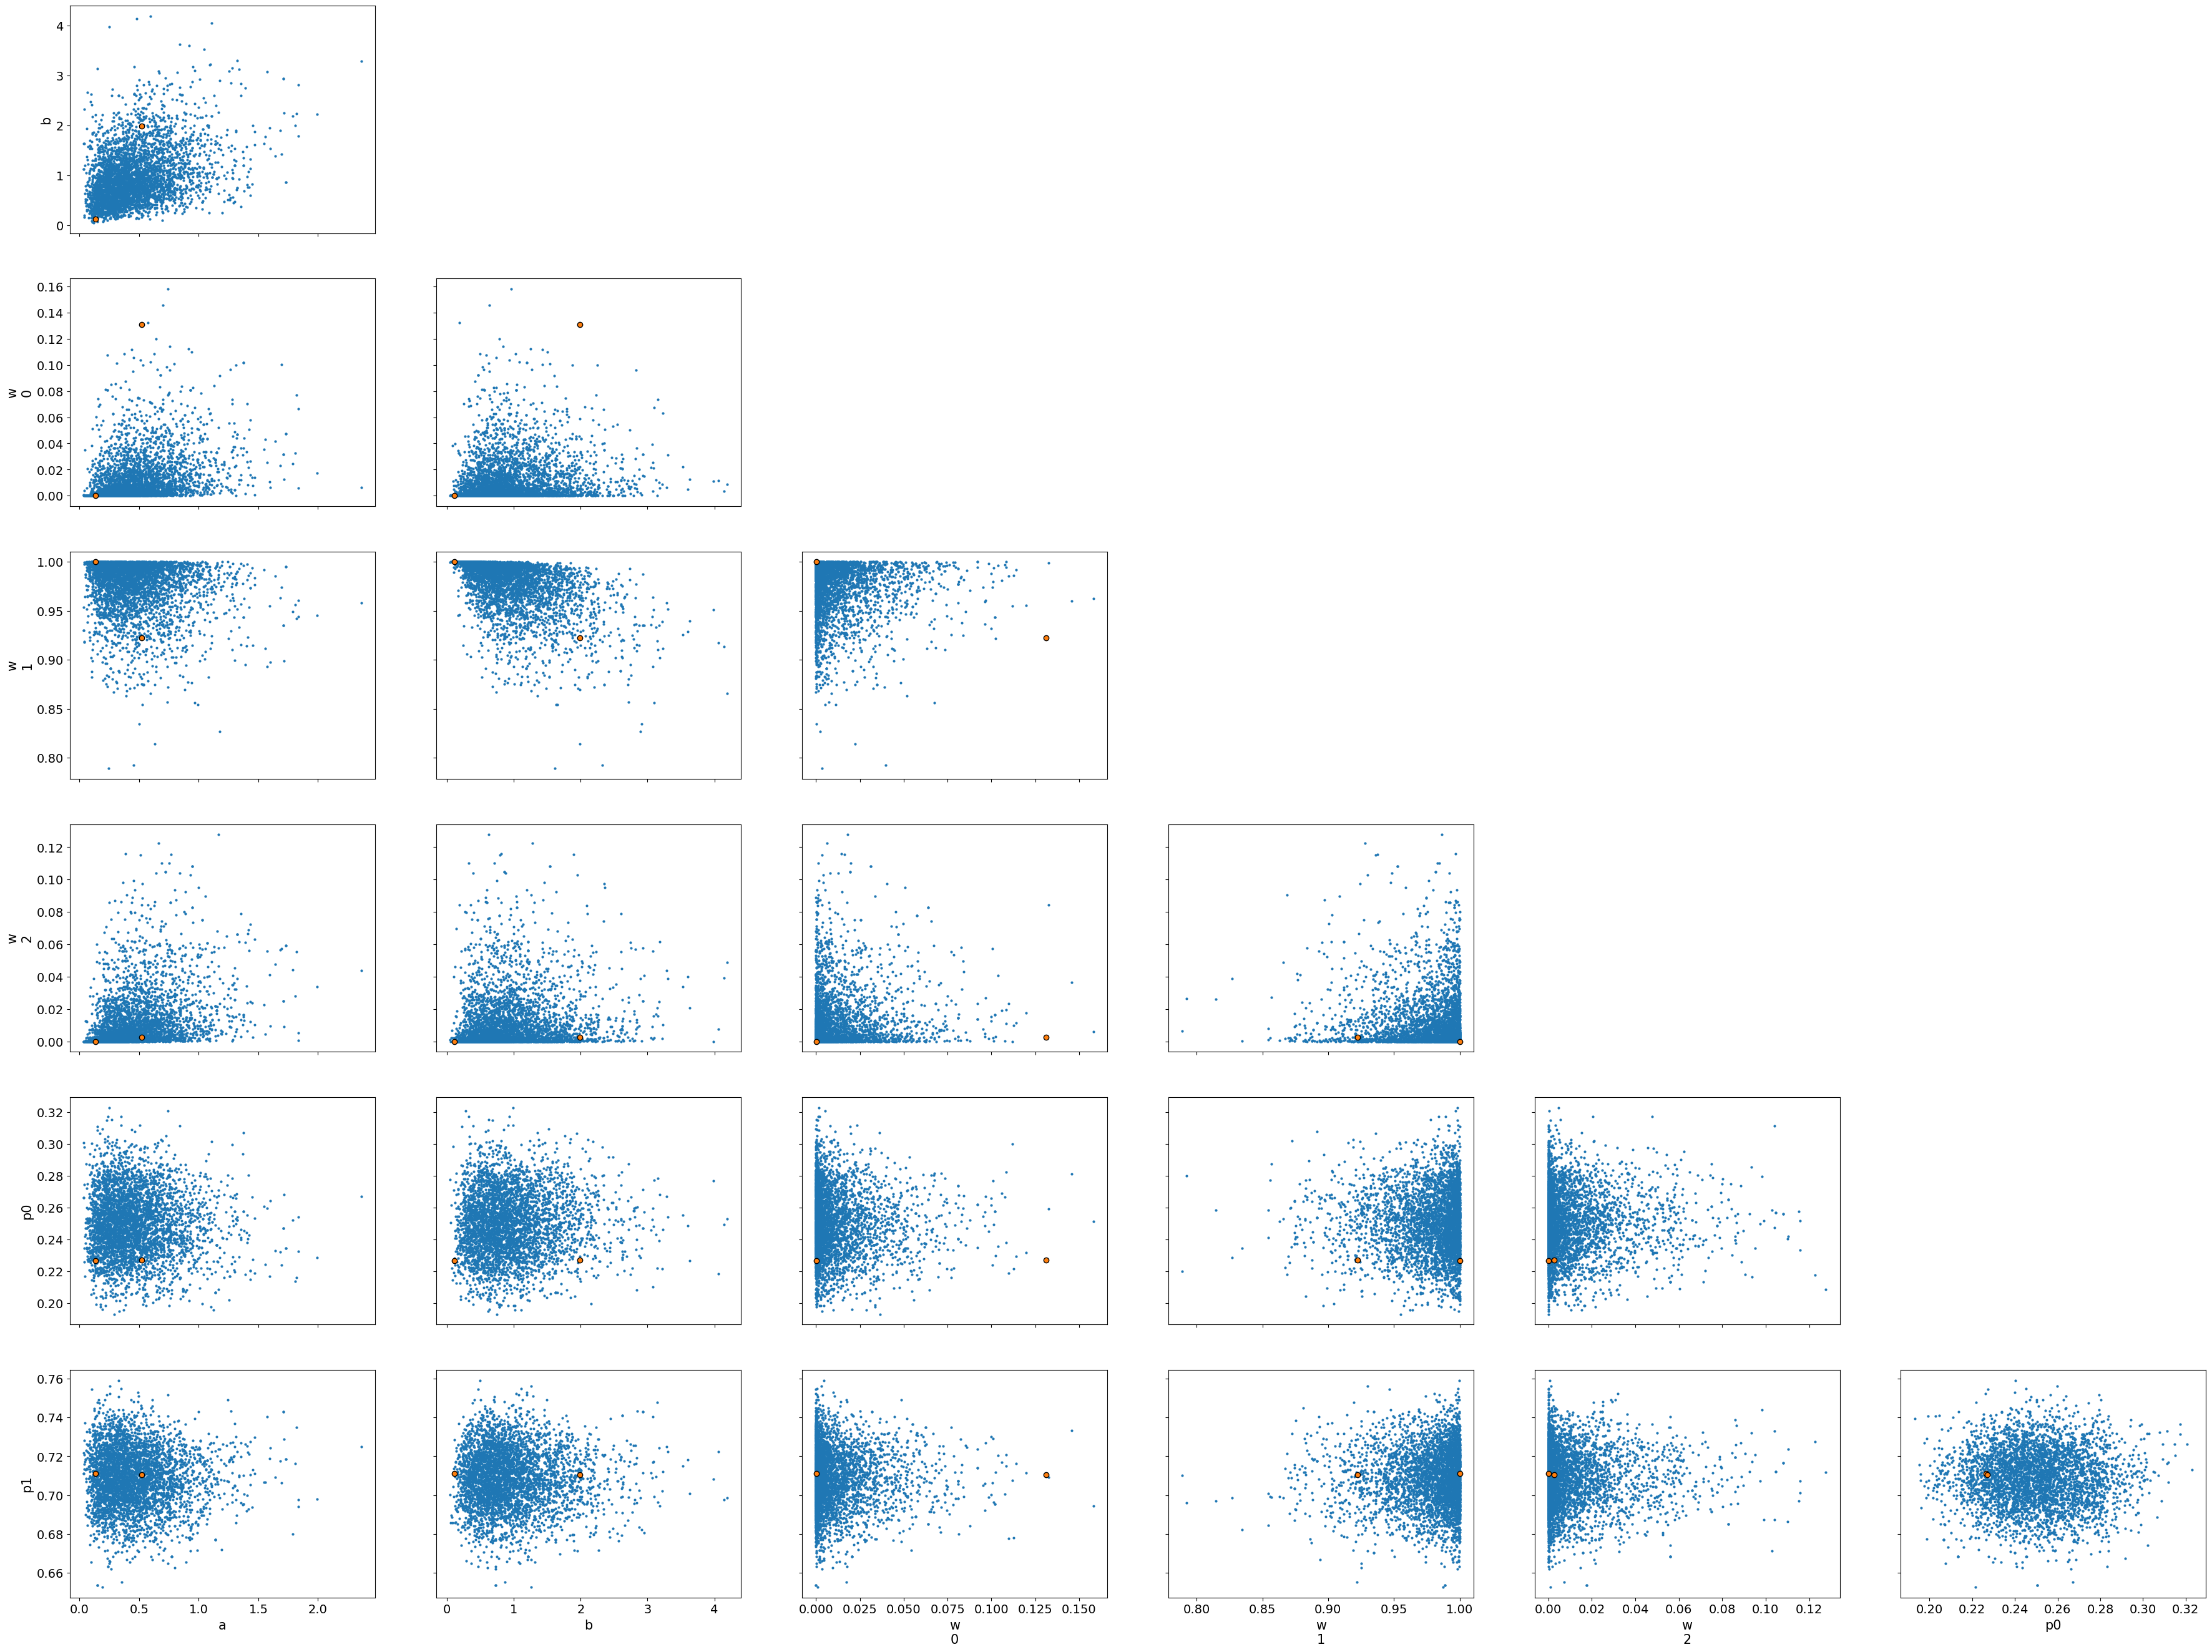

In [148]:
az.plot_pair(trace,divergences=True);

In [31]:
with pm.Model() as lucifers_funnel:
    
    # loggamma = pm.Normal('lgamma', 3.0)
    # gamma = pm.Deterministic('gamma', pm.math.exp(loggamma)/(1 + pm.math.exp(loggamma)))
    mu = pm.Beta('mu',5,5)
    x = pm.Beta('x', mu=mu, sigma=mu * (1-mu))

In [32]:
with lucifers_funnel:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


c:\Users\dsaun\Anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\pairplot.py:232: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  gridsize = int(dataset.dims["draw"] ** 0.35)


<Axes: xlabel='mu', ylabel='x'>

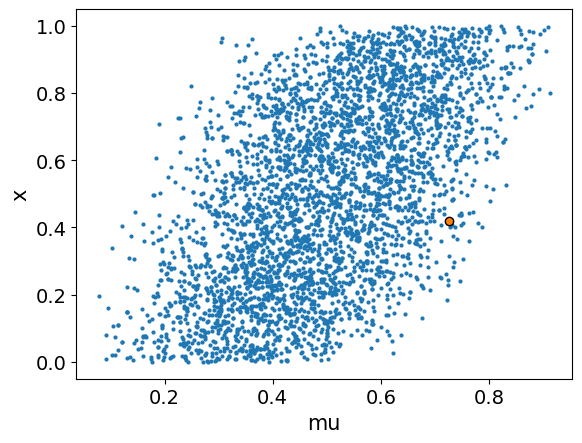

In [33]:
az.plot_pair(trace,divergences=True)